<a href="https://colab.research.google.com/github/kiwkivy/theoryOfProbability/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

========================== Числовая часть. ===========================
Вариационный ряд (частота встречаемости у всех элементов p = 0.05):
[-1.73, -1.35, -0.48, -0.45, -0.3, -0.24, -0.18, 0.0, 0.03, 0.17]
[0.26, 0.31, 0.51, 0.59, 0.73, 0.83, 1.35, 1.59, 1.6, 1.7]
Минимальное значение:  -1.73
Максимальное значение:  1.7
Размах:  3.4299999999999997
Математическое ожидание Mx =  0.2936999999999999
Cреднеквадратическое отклонение  σ =  0.8805151389953497
Эмпирическая функция распределения:
F*( -2.073 ) = 0
F*( -1.387 ) = 0.05
F*( -0.7010000000000001 ) = 0.1
F*( -0.015000000000000124 ) = 0.35
F*( 0.6709999999999998 ) = 0.7
F*( 1.3569999999999998 ) = 0.85
F*( 2.043 ) = 1.0
========================== Визуальная часть.==========================


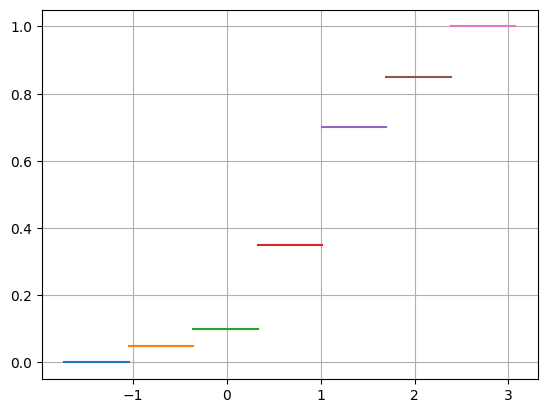

            Рисунок 1. Эмпирическая функция распределения.            


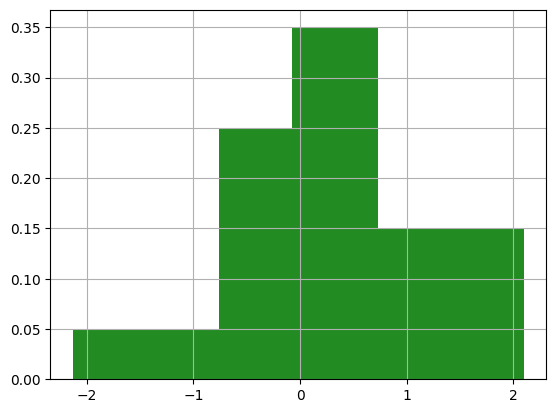

                       Рисунок 2. Гистограмма.                        


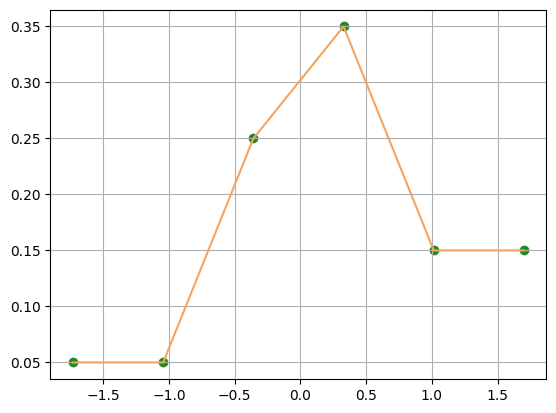

                Рисунок 3. Полигон приведённых частот                 


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

part1 = " Числовая часть. "
part2 = " Визуальная часть."

print(part1.center(70, "="))

x = [0.83, -0.48, -1.35, 0.31, 0.59, 1.35, -0.30, -0.24, 0.51, 0.26,
     0.73, 0.00, 1.59, 0.17, -0.45, 1.60, -0.18, -1.73, 0.03, 1.70]

x.sort()
print("Вариационный ряд (частота встречаемости у всех элементов p = 0.05):")
print(x[:10])
print(x[10:])
l = len(x)

min = x[0]
max = x[-1]
print("Минимальное значение: ", min)
print("Максимальное значение: ", max)
r = max-min
print("Размах: ", r)

ster = int(math.log2(l) + 1) #формула Стерджесса
h = r / ster
half = h / 2
inter = {} #массив для интервального ряда
for i in np.arange(min, max + half, h):
  k = 0
  for j in x:
    if i - half <= j < i + half:
      k+=1
  inter[i] = k
  #print("от", i - half, "до", i + half, ":", k)

m = 0
for i in list(inter):
  m += i * inter[i]
m /= l
print("Математическое ожидание Mx = ", m)

d = 0
for i in list(inter):
  d +=((i**2) * inter[i])
d = d / l - m**2
#print("Дисперсия Dx = ", d)
σ = d ** 0.5;
print("Cреднеквадратическое отклонение  σ = ", σ)

f = {min: 0}
print("Эмпирическая функция распределения:")
for i in list(inter):
    print("F*(", i - half, ") =", f[i])
    f[i + h] = f[i] + inter[i] / l
print("F*(", max + half, ") =", list(f.values())[-1])

print(part2.center(70, "="))
image1 = "Рисунок 1. Эмпирическая функция распределения."
image2 = "Рисунок 2. Гистограмма."
image3 = "Рисунок 3. Полигон приведённых частот"
for i in list(f):
    plt.plot([i, i + h], [f[i], f[i]]);
    #ниже график соединённый
    #plt.plot(list(f), list(f.values()))
plt.grid(True)
plt.show()
print(image1.center(70))

p = {}
for i in list(inter):
    p[i] = inter[i] / len(x)
plt.figure()
plt.bar(list(p), list(p.values()), color = 'forestgreen')
plt.grid(True)
plt.show()
print(image2.center(70))

plt.figure()

plt.plot(list(p), list(p.values()), color = 'sandybrown')
plt.scatter(list(p), list(p.values()), color = 'forestgreen')
plt.grid(True)
plt.show()
print(image3.center(70))